In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [7]:
df['target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [8]:
df[df.target==1].head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
50                7.0               3.2  ...               1.4       1
51                6.4               3.2  ...               1.5       1
52                6.9               3.1  ...               1.5       1
53                5.5               2.3  ...               1.3       1
54                6.5               2.8  ...               1.5       1

[5 rows x 5 columns]

In [9]:
df[df.target == 2].head()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
100                6.3               3.3  ...               2.5       2
101                5.8               2.7  ...               1.9       2
102                7.1               3.0  ...               2.1       2
103                6.3               2.9  ...               1.8       2
104                6.5               3.0  ...               2.2       2

[5 rows x 5 columns]

In [ ]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

sepal length (cm)  sepal width (cm)  ...  target  flower_name
0                5.1               3.5  ...       0       setosa
1                4.9               3.0  ...       0       setosa
2                4.7               3.2  ...       0       setosa
3                4.6               3.1  ...       0       setosa
4                5.0               3.6  ...       0       setosa

[5 rows x 6 columns]

In [ ]:
df[45:55]

sepal length (cm)  sepal width (cm)  ...  target  flower_name
45                4.8               3.0  ...       0       setosa
46                5.1               3.8  ...       0       setosa
47                4.6               3.2  ...       0       setosa
48                5.3               3.7  ...       0       setosa
49                5.0               3.3  ...       0       setosa
50                7.0               3.2  ...       1   versicolor
51                6.4               3.2  ...       1   versicolor
52                6.9               3.1  ...       1   versicolor
53                5.5               2.3  ...       1   versicolor
54                6.5               2.8  ...       1   versicolor

[10 rows x 6 columns]

In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal length vs Sepal Widtg (Setosa vs Versicolor)

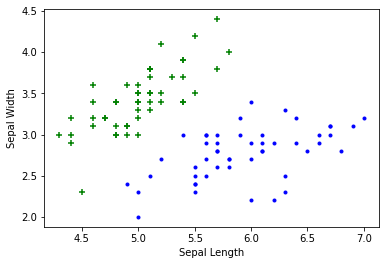

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')

Petal Length & Petal Width (Setosa vs Versicolor)

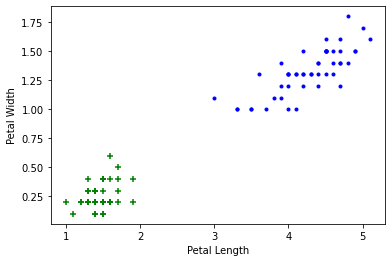

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker="+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')

Train Using SVM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
len(X_train)

120

In [ ]:
len(X_test)

30

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, y_test)

0.9

In [ ]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [ ]:
model.predict([[7.0,3.2,4.7,1.4]])

array([1])